## Data Preprocessing    

In [1]:
#importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#reading the csv file

df=pd.read_csv('lending_club_loans.csv')
df.shape

C:\Users\patel\AppData\Local\Temp\ipykernel_27652\4211197254.py:3: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('lending_club_loans.csv')


(42538, 115)

In [4]:
#Feature Engineering

# Define the required columns
selected_columns = [
    'loan_amnt','installment' ,'emp_length', 'term', 'int_rate', 'home_ownership',
    'annual_inc', 'purpose', 'dti', 'fico_range_high',
    'funded_amnt', 'loan_status'
]


new_df = df[selected_columns]
new_df.shape

(42538, 12)

In [5]:
# Managing the loan_status
new_df['loan_status'] = new_df['loan_status'].replace("Charged Off", "Default")
new_df['loan_status']

# Keep only Fully Paid or Charged Off loan statuses
new_df = new_df[new_df['loan_status'].isin(['Fully Paid', 'Default'])]

C:\Users\patel\AppData\Local\Temp\ipykernel_27652\551503026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['loan_status'] = new_df['loan_status'].replace("Charged Off", "Default")


In [6]:
print(new_df['loan_status'].value_counts())

loan_status
Fully Paid    33586
Default        5654
Name: count, dtype: int64


In [7]:
print("Checking for the missing values")
print(new_df.isna().sum())

Checking for the missing values
loan_amnt             0
installment           0
emp_length         1057
term                  0
int_rate              0
home_ownership        0
annual_inc            0
purpose               0
dti                   0
fico_range_high       0
funded_amnt           0
loan_status           0
dtype: int64


In [8]:
#The emp_length column has categorical values the below function will encode it

def encode_emp_length(emp):
    if emp=='< 1 year':
        return 0
    elif emp=='10+ years':
        return 10
    else:
        return int(emp.split()[0]) if isinstance(emp,str) and emp[0].isdigit else None

In [9]:
# runing the ffunction on the emp_length column
new_df['emp_length']=new_df['emp_length'].apply(encode_emp_length)

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

def fill_missing_values_nn(df):
    # Separate the rows with and without missing 'emp_length'
    df_not_na = df[df['emp_length'].notna()]
    df_na = df[df['emp_length'].isna()]

    # Features (X) and target (y) for rows where 'emp_length' is not missing
    X = df_not_na.drop(columns=['emp_length'])
    y = df_not_na['emp_length']

    # Label Encoding for categorical columns
    categorical_columns = X.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        label_encoder = LabelEncoder()
        X[col] = label_encoder.fit_transform(X[col])

    # Train-Test Split for model evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Multi-Layer Perceptron (MLP) Classifier
    model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
    model.fit(X_train, y_train)

    # Predict missing values in the 'emp_length' column
    X_na = df_na.drop(columns=['emp_length'])  # Features for rows with missing 'emp_length'

    # Apply the same Label Encoding to the categorical columns in the missing data
    for col in categorical_columns:
        label_encoder = LabelEncoder()
        X_na[col] = label_encoder.fit_transform(X_na[col])

    # Predict the missing 'emp_length' values using the trained model
    df.loc[df['emp_length'].isna(), 'emp_length'] = model.predict(X_na)

    # Optional: Evaluate the model's performance on the test set
    print("Model performance on test set:")
    print(f"Accuracy Score: {accuracy_score(y_test, model.predict(X_test))}")
    print("Classification Report:")
    print(classification_report(y_test, model.predict(X_test)))

    return df

# Example usage:
new_df = fill_missing_values_nn(new_df)

# Verify that the missing values are filled
print(new_df.isna().sum())


Model performance on test set:
Accuracy Score: 0.16485530967657458
Classification Report:
              precision    recall  f1-score   support

         0.0       0.40      0.00      0.00       902
         1.0       0.09      0.36      0.15       723
         2.0       0.15      0.32      0.21       868
         3.0       0.11      0.13      0.12       817
         4.0       0.00      0.00      0.00       683
         5.0       0.00      0.00      0.00       600
         6.0       0.00      0.00      0.00       419
         7.0       0.00      0.00      0.00       372
         8.0       0.00      0.00      0.00       270
         9.0       0.00      0.00      0.00       279
        10.0       0.31      0.36      0.33      1704

    accuracy                           0.16      7637
   macro avg       0.10      0.11      0.07      7637
weighted avg       0.15      0.16      0.12      7637

loan_amnt          0
installment        0
emp_length         0
term               0
int_rate     

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
new_df

,loan_amnt,installment,emp_length,term,int_rate,home_ownership,annual_inc,purpose,dti,fico_range_high,funded_amnt,loan_status
0,5000.0,162.87,10.0,36 months,10.65%,RENT,24000.0,credit_card,27.65,739.0,5000.0,Fully Paid
1,2500.0,59.83,0.0,60 months,15.27%,RENT,30000.0,car,1.00,744.0,2500.0,Default
2,2400.0,84.33,10.0,36 months,15.96%,RENT,12252.0,small_business,8.72,739.0,2400.0,Fully Paid
3,10000.0,339.31,10.0,36 months,13.49%,RENT,49200.0,other,20.00,694.0,10000.0,Fully Paid
5,5000.0,156.46,3.0,36 months,7.90%,RENT,36000.0,wedding,11.20,734.0,5000.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,78.42,4.0,36 months,8.07%,MORTGAGE,110000.0,home_improvement,11.33,764.0,2500.0,Fully Paid
39782,8500.0,275.38,3.0,36 months,10.28%,RENT,18000.0,credit_card,6.40,694.0,8500.0,Fully Paid
39783,5000.0,156.84,0.0,36 months,8.07%,MORTGAGE,100000.0,debt_consolidation,2.30,744.0,5000.0,Fully Paid
39784,5000.0,155.38,0.0,36 months,7.43%,MORTGAGE,200000.0,other,3.72,814.0,5000.0,Fully Paid


In [12]:
#the int_rate has a % sign which is not needed so the below function will remove the sign and will clean it
def clean_int_rate(int_rate):
    return float(int_rate[:-1])
new_df['int_rate']=new_df['int_rate'].apply(clean_int_rate)
new_df

,loan_amnt,installment,emp_length,term,int_rate,home_ownership,annual_inc,purpose,dti,fico_range_high,funded_amnt,loan_status
0,5000.0,162.87,10.0,36 months,10.65,RENT,24000.0,credit_card,27.65,739.0,5000.0,Fully Paid
1,2500.0,59.83,0.0,60 months,15.27,RENT,30000.0,car,1.00,744.0,2500.0,Default
2,2400.0,84.33,10.0,36 months,15.96,RENT,12252.0,small_business,8.72,739.0,2400.0,Fully Paid
3,10000.0,339.31,10.0,36 months,13.49,RENT,49200.0,other,20.00,694.0,10000.0,Fully Paid
5,5000.0,156.46,3.0,36 months,7.90,RENT,36000.0,wedding,11.20,734.0,5000.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,78.42,4.0,36 months,8.07,MORTGAGE,110000.0,home_improvement,11.33,764.0,2500.0,Fully Paid
39782,8500.0,275.38,3.0,36 months,10.28,RENT,18000.0,credit_card,6.40,694.0,8500.0,Fully Paid
39783,5000.0,156.84,0.0,36 months,8.07,MORTGAGE,100000.0,debt_consolidation,2.30,744.0,5000.0,Fully Paid
39784,5000.0,155.38,0.0,36 months,7.43,MORTGAGE,200000.0,other,3.72,814.0,5000.0,Fully Paid


In [13]:
# new_df['purpose'].value_counts()

# Defining the proper Purpose values
def format_purpose(purpose):
    if '_' in purpose:
        return ' '.join([word.capitalize() for word in purpose.split('_')])
    else:
        return purpose.capitalize()

In [14]:
new_df['purpose']=new_df['purpose'].apply(format_purpose)
new_df

,loan_amnt,installment,emp_length,term,int_rate,home_ownership,annual_inc,purpose,dti,fico_range_high,funded_amnt,loan_status
0,5000.0,162.87,10.0,36 months,10.65,RENT,24000.0,Credit Card,27.65,739.0,5000.0,Fully Paid
1,2500.0,59.83,0.0,60 months,15.27,RENT,30000.0,Car,1.00,744.0,2500.0,Default
2,2400.0,84.33,10.0,36 months,15.96,RENT,12252.0,Small Business,8.72,739.0,2400.0,Fully Paid
3,10000.0,339.31,10.0,36 months,13.49,RENT,49200.0,Other,20.00,694.0,10000.0,Fully Paid
5,5000.0,156.46,3.0,36 months,7.90,RENT,36000.0,Wedding,11.20,734.0,5000.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,78.42,4.0,36 months,8.07,MORTGAGE,110000.0,Home Improvement,11.33,764.0,2500.0,Fully Paid
39782,8500.0,275.38,3.0,36 months,10.28,RENT,18000.0,Credit Card,6.40,694.0,8500.0,Fully Paid
39783,5000.0,156.84,0.0,36 months,8.07,MORTGAGE,100000.0,Debt Consolidation,2.30,744.0,5000.0,Fully Paid
39784,5000.0,155.38,0.0,36 months,7.43,MORTGAGE,200000.0,Other,3.72,814.0,5000.0,Fully Paid


In [15]:
#creating a new column named fico_category to categorise the FICO scores in the dataset
def assign_fico_category(fico_score):
    score_bins = [300, 579, 669, 739, 799, 850]
    score_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
    
    for i in range(len(score_bins)-1):
        if fico_score >= score_bins[i] and fico_score <= score_bins[i+1]:
            return score_labels[i]
    
    return None  # In case of any unexpected values

df['fico_category'] = df['fico_range_high'].apply(assign_fico_category)



In [16]:

print(df[['fico_range_high', 'fico_category']].head())  # Verify the changes

   fico_range_high fico_category
0            739.0          Good
1            744.0     Very Good
2            739.0          Good
3            694.0          Good
4            699.0          Good


In [17]:
# Perform the calculations for monthly income and the installment to payment ratio
new_df['monthly_inc'] = new_df['annual_inc'] / 12
new_df['installment_to_income_ratio %'] = (new_df['installment'] / new_df['monthly_inc']) * 100

# Verify the changes
print(new_df[['monthly_inc', 'installment_to_income_ratio %']].head())

   monthly_inc  installment_to_income_ratio %
0       2000.0                       8.143500
1       2500.0                       2.393200
2       1021.0                       8.259549
3       4100.0                       8.275854
5       3000.0                       5.215333


In [ ]:
new_df

In [44]:
new_df.to_csv("cleaned_dataset.csv", index=False)

# Univariate Analysis


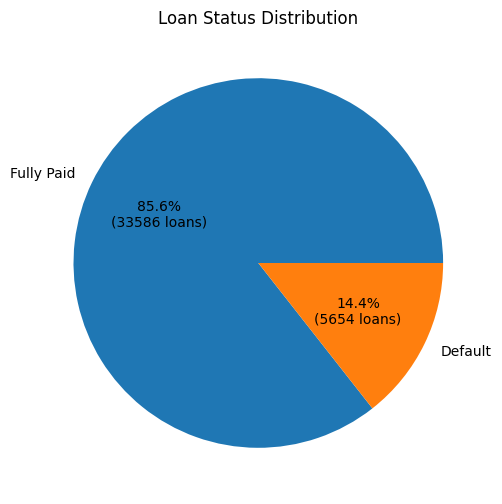

In [23]:
# 1. Number and Percentage of Default Loans



# Calculate the counts of each loan status
loan_status_counts = new_df["loan_status"].value_counts()

# Define a function to format the pie chart annotations
def func(pct, allvals):
    absolute = int(round(pct / 100. * sum(allvals)))
    return "{:.1f}%\n({:d} loans)".format(pct, absolute)

plt.figure(figsize=(6, 6))
plt.pie(
    loan_status_counts, 
    labels=loan_status_counts.index, 
    autopct=lambda pct: func(pct, loan_status_counts),
    
)
plt.title('Loan Status Distribution')
plt.show()

C:\Users\patel\AppData\Local\Temp\ipykernel_27652\622345680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=loan_purpose_counts.index,y=loan_purpose_counts.values,palette="Set2")


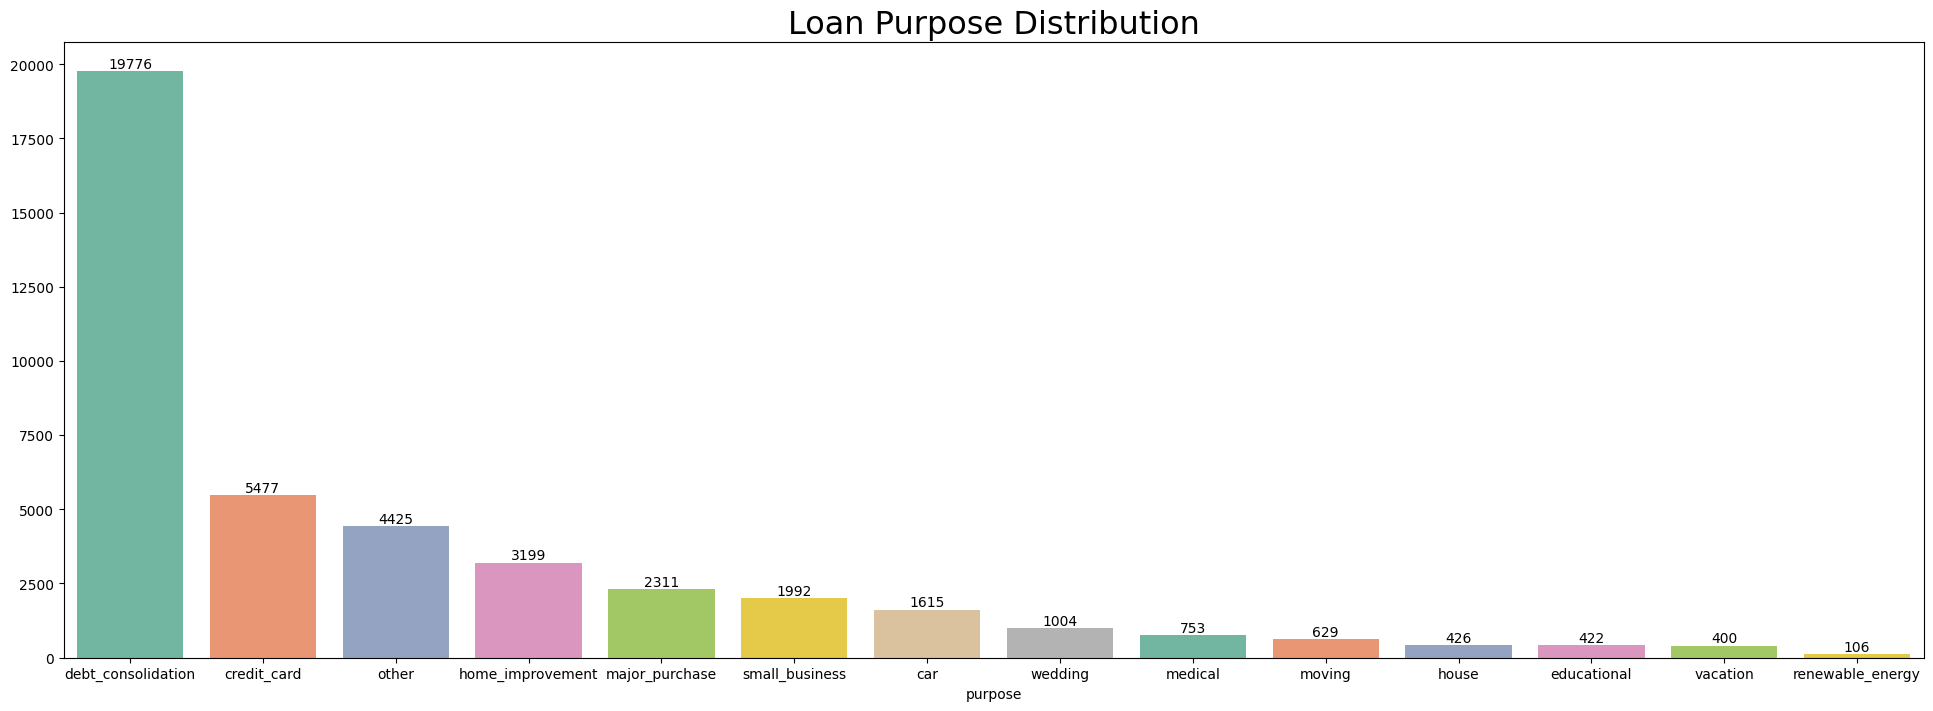

In [20]:
# 2. Majority Loan Purpose
loan_purpose_counts = df["purpose"].value_counts()

plt.figure(figsize=(24,8))
plt.title("Loan Purpose Distribution",fontsize="23")
ax=sns.barplot(x=loan_purpose_counts.index,y=loan_purpose_counts.values,palette="Set2")
bars=ax.patches
heights=[bar.get_height() for bar in bars]

#adding annoation on the top of te bar chart
for bar,height in zip(bars,heights):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom"
    )
plt.show()

C:\Users\patel\AppData\Local\Temp\ipykernel_26564\596192287.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2=sns.barplot(x=homeownership_defaults.index, y=homeownership_defaults.values, palette="coolwarm")


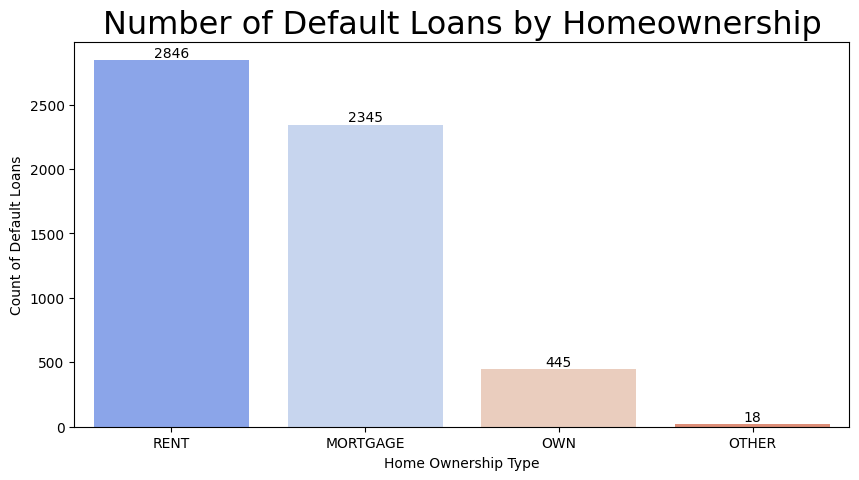

In [ ]:
# 3. Default Loans by Homeownership Type
homeownership_defaults = new_df[new_df["loan_status"] == "Default"]["home_ownership"].value_counts()

# Plot Default Loans by Homeownership
plt.figure(figsize=(10, 5))
ax2=sns.barplot(x=homeownership_defaults.index, y=homeownership_defaults.values, palette="coolwarm")
bars2=ax2.patches
height2=[bar.get_height() for bar in bars2]
for bar,height in zip(bars2,height2):
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom"
    )
plt.title("Number of Default Loans by Homeownership",fontsize="23")
plt.xlabel("Home Ownership Type")
plt.ylabel("Count of Default Loans")
plt.show()

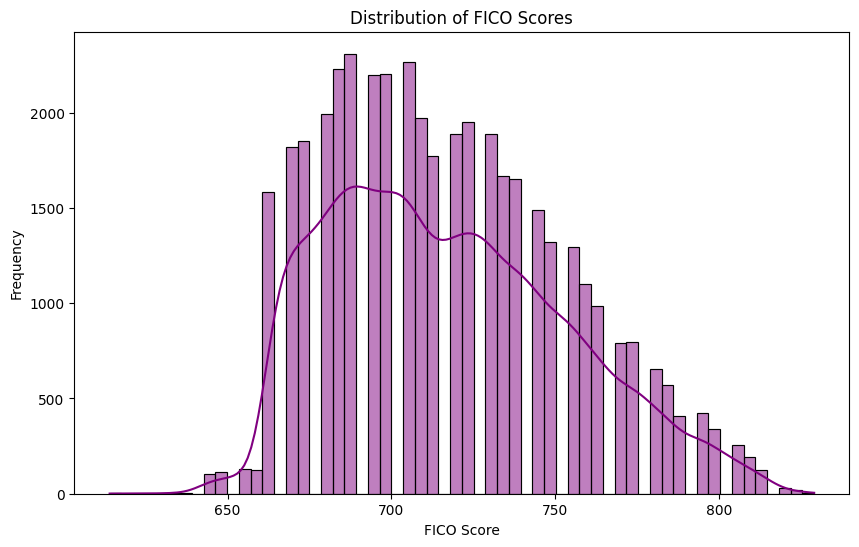

fico_range_high
619.0       1
624.0       1
629.0       2
614.0       2
829.0       3
639.0       5
634.0       6
824.0      19
819.0      28
644.0     102
649.0     112
814.0     125
659.0     127
654.0     131
809.0     193
804.0     256
799.0     338
789.0     406
794.0     422
784.0     573
779.0     654
769.0     792
774.0     799
764.0     984
759.0    1100
754.0    1294
749.0    1319
744.0    1490
664.0    1584
739.0    1653
734.0    1670
714.0    1771
669.0    1821
674.0    1854
729.0    1891
719.0    1891
724.0    1949
709.0    1970
679.0    1994
694.0    2196
699.0    2202
684.0    2228
704.0    2267
689.0    2310
Name: count, dtype: int64

In [31]:
# 4. FICO Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['fico_range_high'], bins=60, kde=True, color='purple')
plt.title("Distribution of FICO Scores")
plt.xlabel("FICO Score")
plt.ylabel("Frequency")
plt.show()


(df['fico_range_high'].value_counts()).sort_values()

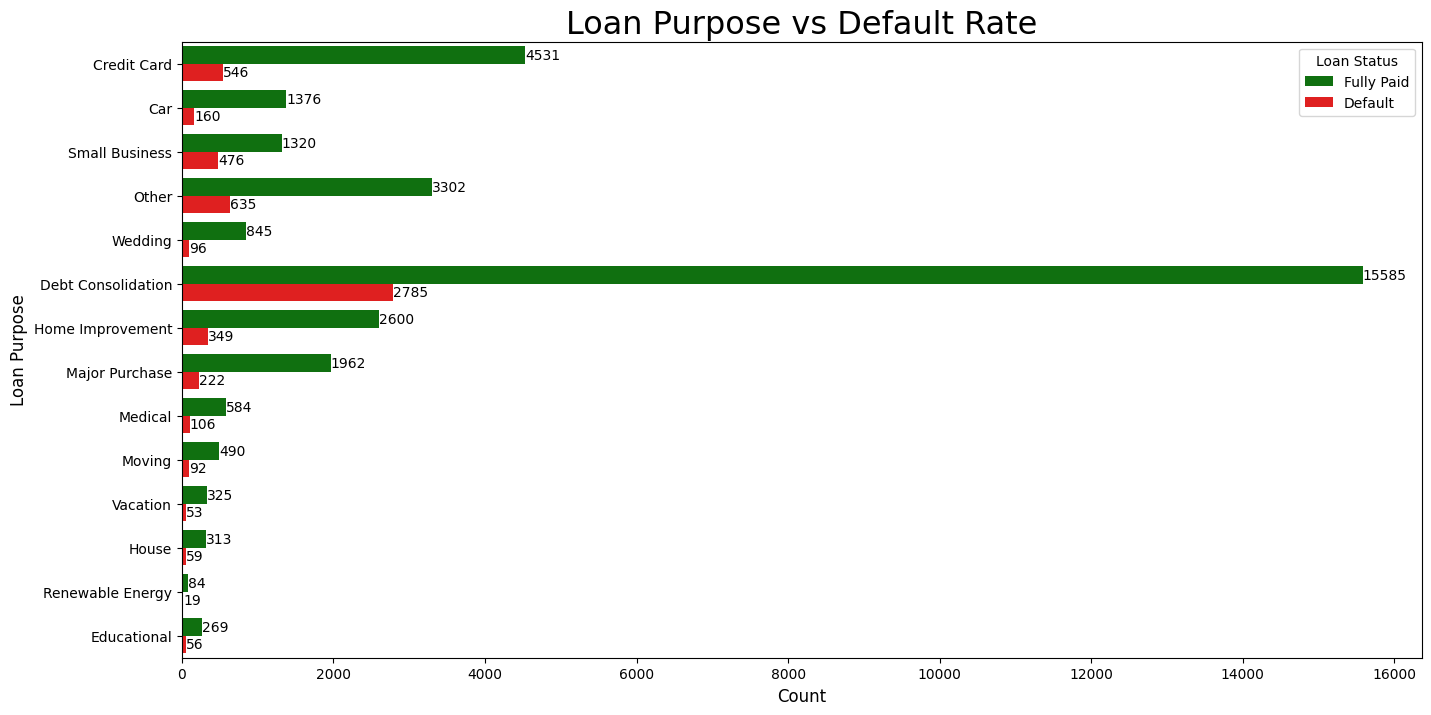

In [43]:
plt.figure(figsize=(16, 8))
ax3 = sns.countplot(y=new_df['purpose'], hue=new_df['loan_status'], palette=['green', 'red'])

# Adding annotation on the top of the bars
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d')

plt.title('Loan Purpose vs Default Rate', fontsize=23)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Loan Purpose', fontsize=12)
plt.legend(title='Loan Status')